<a href="https://colab.research.google.com/github/sweetiepickle/AI-13-3-23-machine-learning/blob/main/machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<function matplotlib.pyplot.show(close=None, block=None)>

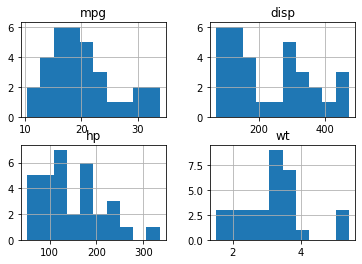

In [104]:
import pandas as pd
url = 'mtcars.csv'
data= pd.read_csv(url)

import matplotlib.pyplot as plt
data.hist()
plt.show

In [105]:
correlation= data.corr()    # mối tương quan
print(correlation)

           mpg      disp        hp        wt
mpg   1.000000 -0.847551 -0.776168 -0.867659
disp -0.847551  1.000000  0.790949  0.887980
hp   -0.776168  0.790949  1.000000  0.658748
wt   -0.867659  0.887980  0.658748  1.000000


<AxesSubplot:>

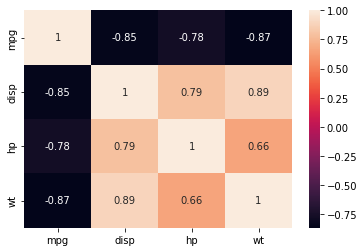

In [106]:
import seaborn as sns
sns.heatmap(correlation, annot= True)   
# giá trị tuyệt đối càng lơn thì mối tương quan càng cao
# dấu +- thể hiện tỷ lệ thuận / nghịch  

<AxesSubplot:xlabel='wt', ylabel='mpg'>

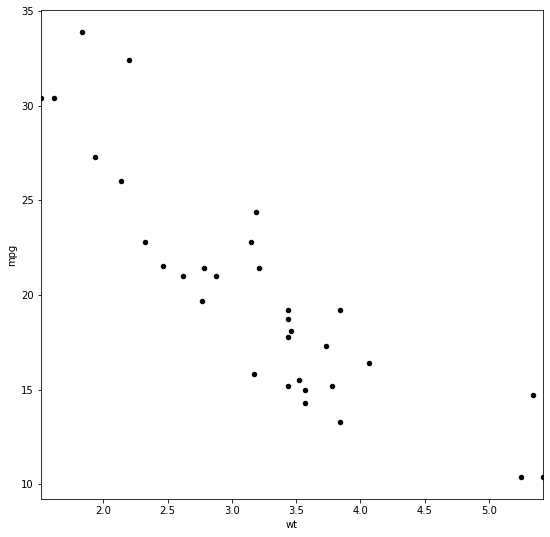

In [112]:
data.plot(kind='scatter', x='wt', y='mpg', figsize= (9,9), color= 'black', xlim = (data['wt'].min(),data['wt'].max()))

In [114]:
from sklearn import linear_model    # 
model= linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['wt']), y= data['mpg'])   # dạy cho thuật toán tự học, tự điều chỉnh : fit
print(model.intercept_)
print(model.coef_)    # coef : hệ số góc
# phương trình hồi quy
# y = coef * x + intercept
model.score(X=pd.DataFrame(data['wt']), y= data['mpg'])   # độ chính xác accuracy

37.28512616734204
[-5.34447157]


0.7528327936582646

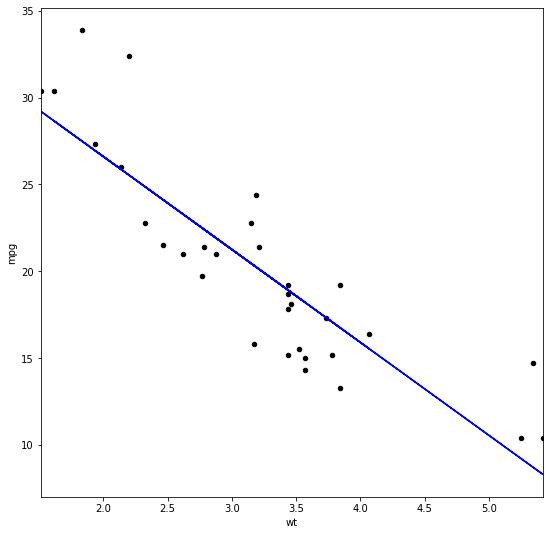

In [115]:
# hồi quy hàm bậc 1
data.plot(kind='scatter', x='wt', y='mpg', figsize= (9,9), color= 'black', xlim = (data['wt'].min(),data['wt'].max()))
y_pred= model.predict(X=pd.DataFrame(data['wt']))
plt.plot(data['wt'], y_pred, color= 'blue')

In [116]:
# hồi quy hàm bậc 2
model= linear_model.LinearRegression()
X=pd.DataFrame([data['wt'], data['wt']**2]).T   
model.fit(X,y= data['mpg'])
print('Intercept của mô hình: ', model.intercept_)
print('Coeffient của mô hình: ', model.coef_)
print('Độ chính xác của mô hình: ', model.score(X, y= data['mpg']))    

Intercept của mô hình:  49.93081094945181
Coeffient của mô hình:  [-13.38033708   1.17108689]
Độ chính xác của mô hình:  0.8190613581384094


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


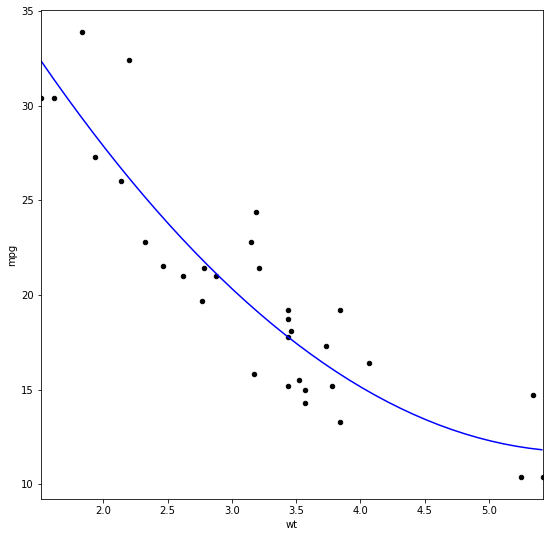

In [117]:
import numpy as np
range= np.arange(data['wt'].min(), data['wt'].max(), 0.1)
data.plot(kind='scatter', x='wt', y='mpg', figsize= (9,9), color= 'black', xlim = (data['wt'].min(),data['wt'].max()))
predictor= pd.DataFrame([range, range ** 2]).T
y_pred= model.predict(X= predictor)
plt.plot(range, y_pred, color= 'blue')

In [118]:
# hồi quy bậc 3
model= linear_model.LinearRegression()
X=pd.DataFrame([data['wt'],data['wt']**2, data['wt']**3]).T   
model.fit(X,y= data['mpg'])
print('Intercept của mô hình: ', model.intercept_)
print('Coeffient của mô hình: ', model.coef_)
print('Độ chính xác của mô hình: ', model.score(X, y= data['mpg']))    

Intercept của mô hình:  48.40369622795221
Coeffient của mô hình:  [-11.82597602   0.68937919   0.04593618]
Độ chính xác của mô hình:  0.8191284628478992


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


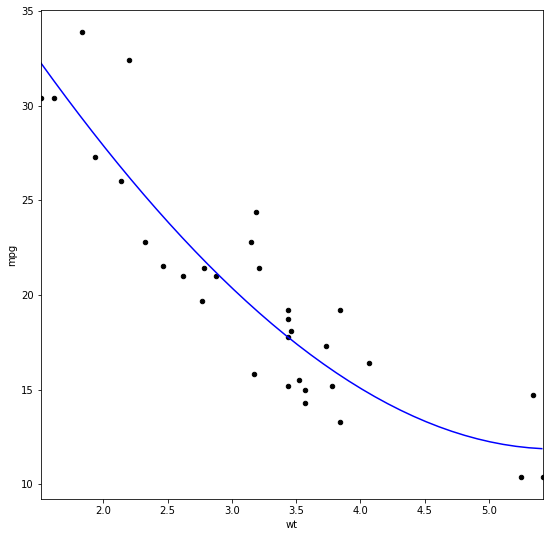

In [119]:
range= np.arange(data['wt'].min(), data['wt'].max(), 0.1)
data.plot(kind='scatter', x='wt', y='mpg', figsize= (9,9), color= 'black', xlim = (data['wt'].min(),data['wt'].max()))
predictor= pd.DataFrame([range, range**2, range**3]).T
y_pred= model.predict(X= predictor)
plt.plot(range, y_pred, color= 'blue')

In [120]:
# hồi quy bậc 5
model= linear_model.LinearRegression()
X=pd.DataFrame([data['wt'],data['wt']**2, data['wt']**3, data['wt']**5]).T   
model.fit(X,y= data['mpg'])
print('Intercept của mô hình: ', model.intercept_)
print('Coeffient của mô hình: ', model.coef_)
print('Độ chính xác của mô hình: ', model.score(X, y= data['mpg']))   

Intercept của mô hình:  22.682024483841552
Coeffient của mô hình:  [ 2.28090761e+01 -1.49133817e+01  2.53727573e+00 -2.15670161e-02]
Độ chính xác của mô hình:  0.8215899139433847


In [121]:
# hồi quy 2 biến
model= linear_model.LinearRegression()
model.fit(X= data.loc[:, ['wt','hp']], y= data['mpg'])
print(model.intercept_)
print(model.coef_)
print(model.score(X= data.loc[:, ['wt','hp']], y= data['mpg']))

# phương trình hồi quy: mpg = -3.877wt - 0.031hp + 37.22  

37.227270116447215
[-3.87783074 -0.03177295]
0.8267854518827914


Salary


<AxesSubplot:>

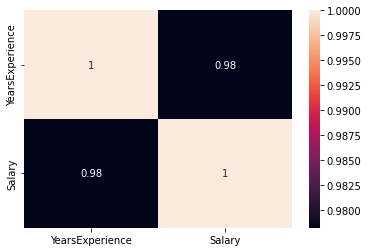

In [123]:
url = 'Salary_Data.csv'
data= pd.read_csv(url)

import seaborn as sns
#sns.pairplot(data)
correlation= data.corr()    # mối tương quan
sns.heatmap(correlation, annot= True)


In [125]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
X=pd.DataFrame([data['Salary'],data['Salary']**2, data['Salary']**3, data['Salary']**4, data['Salary']**5]).T   
model.fit(X, y=data['YearsExperience'])
print('Intercept của mô hình: ', model.intercept_)
print('Coeffient của mô hình: ', model.coef_)
print('Độ chính xác của mô hình: ', model.score(X, y= data['YearsExperience']))   


Intercept của mô hình:  0.22803124445431688
Coeffient của mô hình:  [ 1.57219546e-23  2.11703211e-18  4.35152941e-14 -5.98021785e-19
  2.35657717e-24]
Độ chính xác của mô hình:  0.9582897205522598


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


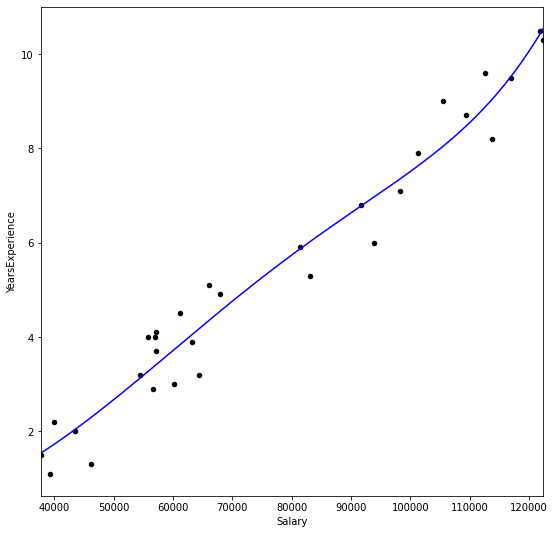

In [127]:
range= np.arange(data['Salary'].min(), data['Salary'].max(), 0.1)
data.plot(kind='scatter', x='Salary', y='YearsExperience', figsize= (9,9), color= 'black', xlim = (data['Salary'].min(),data['Salary'].max()))
predictor= pd.DataFrame([range, range**2, range**3,range**4, range**5]).T
y_pred= model.predict(X=predictor)
plt.plot(range, y_pred, color= 'blue')
#calculation= pd.DataFrame(np.c_[X,y_pred], comumns= ['Original Salary', 'Predicted Salary'])

Advertising

<AxesSubplot:>

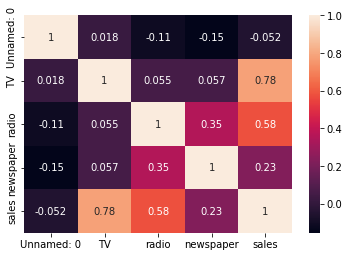

In [92]:
url = 'Advertising.csv'
data= pd.read_csv(url)

import seaborn as sns
#sns.pairplot(data)
correlation= data.corr()    # mối tương quan
#print(correlation)
sns.heatmap(correlation, annot= True)


Intercept của mô hình:  148.41212269588468
Coeffient của mô hình:  [-9.86075966e+01  1.85882019e+01 -1.26231573e+00  3.75458436e-02
 -4.07913310e-04]
Độ chính xác của mô hình:  0.6699533011011998


<AxesSubplot:xlabel='sales', ylabel='TV'>

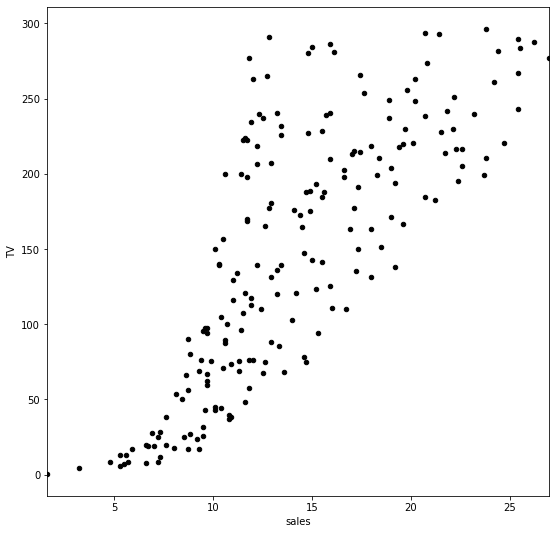

In [98]:
# hồi quy bậc 5
from sklearn.linear_model import LinearRegression
model= LinearRegression()
X=pd.DataFrame([data['sales'],data['sales']**2, data['sales']**3, data['sales']**4, data['sales']**5]).T   
model.fit(X, y=data['TV'])
print('Intercept của mô hình: ', model.intercept_)
print('Coeffient của mô hình: ', model.coef_)
print('Độ chính xác của mô hình: ', model.score(X, y= data['TV']))   
data.plot(kind='scatter', x='sales', y='TV', figsize= (9,9), color= 'black', xlim = (data['sales'].min(),data['sales'].max()))


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


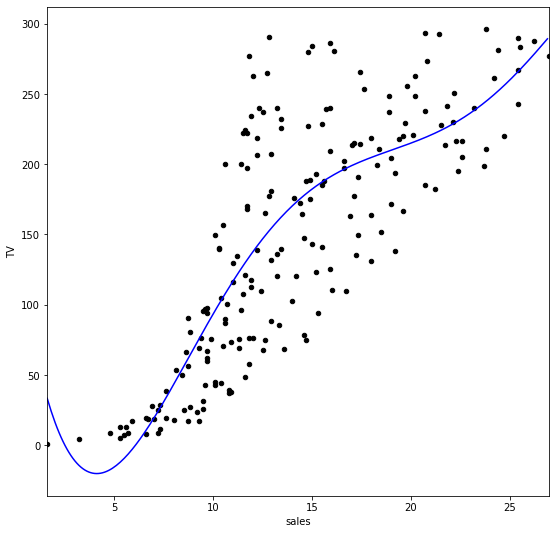

In [99]:
range= np.arange(data['sales'].min(), data['sales'].max(), 0.1)
data.plot(kind='scatter', x='sales', y='TV', figsize= (9,9), color= 'black', xlim = (data['sales'].min(),data['sales'].max()))
predictor= pd.DataFrame([range, range**2, range**3, range**4, range**5]).T
y_pred= model.predict(X= predictor)
plt.plot(range, y_pred, color= 'blue')

Intercept của mô hình:  3.434534787401425
Coeffient của mô hình:  [ 2.77902843e-01 -4.26334402e-03  3.38693899e-05 -1.20207585e-07
  1.55728366e-10]
Độ chính xác của mô hình:  0.6289510709142143


<AxesSubplot:xlabel='TV', ylabel='sales'>

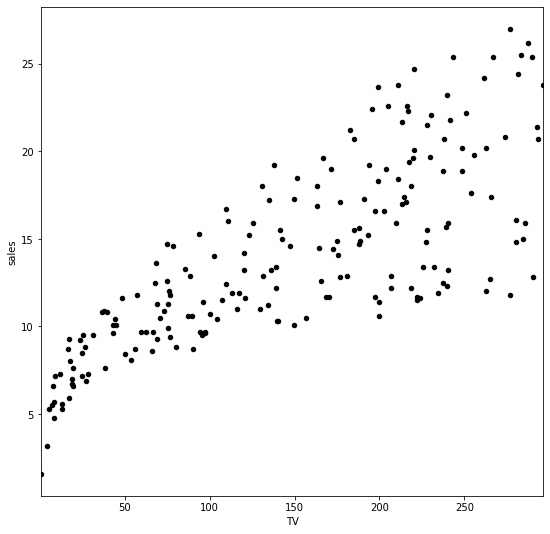

In [102]:
# hồi quy bậc 5
from sklearn.linear_model import LinearRegression
model= LinearRegression()
X=pd.DataFrame([data['TV'],data['TV']**2, data['TV']**3, data['TV']**4, data['TV']**5]).T   
model.fit(X, y=data['sales'])
print('Intercept của mô hình: ', model.intercept_)
print('Coeffient của mô hình: ', model.coef_)
print('Độ chính xác của mô hình: ', model.score(X, y= data['sales']))   
data.plot(kind='scatter', x='TV', y='sales', figsize= (9,9), color= 'black', xlim = (data['TV'].min(),data['TV'].max()))


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


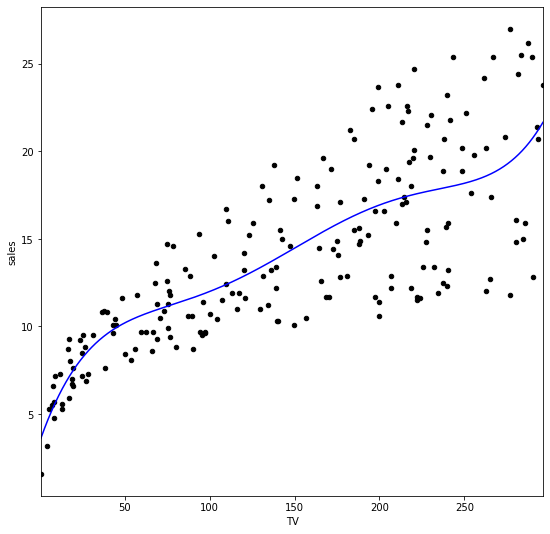

In [103]:
range= np.arange(data['TV'].min(), data['TV'].max(), 0.1)
data.plot(kind='scatter', x='TV', y='sales', figsize= (9,9), color= 'black', xlim = (data['TV'].min(),data['TV'].max()))
predictor= pd.DataFrame([range, range**2, range**3, range**4, range**5]).T
y_pred= model.predict(X= predictor)
plt.plot(range, y_pred, color= 'blue')

Startup


<AxesSubplot:>

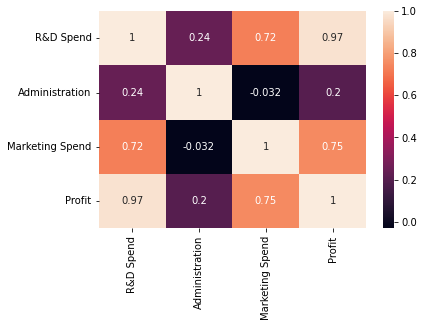

In [130]:
url = '50_Startups.csv'
data= pd.read_csv(url)

import seaborn as sns
sns.heatmap(data.corr(), annot= True)   # mối tương quan : correlation

In [134]:
# hồi quy bậc 5
# trục data là trục y
from sklearn.linear_model import LinearRegression
model= LinearRegression()
X=pd.DataFrame([data['Profit'],data['Profit']**2, data['Profit']**3, data['Profit']**4, data['Profit']**5]).T   
model.fit(X, y=data['R&D Spend'])
print('Intercept của mô hình: ', model.intercept_)
print('Coeffient của mô hình: ', model.coef_)
print('Độ chính xác của mô hình: ', model.score(X, y= data['R&D Spend']))   


Intercept của mô hình:  -9958.015594615994
Coeffient của mô hình:  [ 3.33165776e-20  5.50001896e-15  1.65151470e-10 -1.23285585e-15
  2.59171395e-21]
Độ chính xác của mô hình:  0.9658680149697365


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


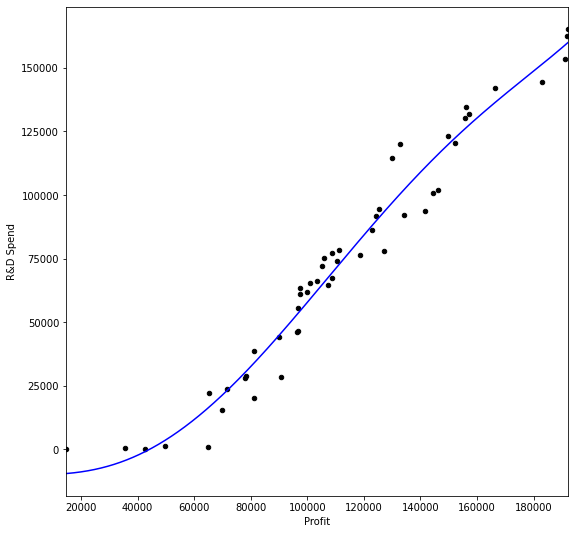

In [135]:
range= np.arange(data['Profit'].min(), data['Profit'].max(), 0.1)    # trục x
data.plot(kind='scatter', x='Profit', y='R&D Spend', figsize= (9,9), color= 'black', xlim = (data['Profit'].min(),data['Profit'].max()))
predictor= pd.DataFrame([range,range**2, range**3, range**4, range**5]).T
y_pred= model.predict(X= predictor)
plt.plot(range, y_pred, color= 'blue')  